# Statistics

In [104]:
from collections import Counter
from linear_algebra import sum_of_squares, dot
import math
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

_Data import_

In [107]:
data=pd.read_csv(r'C:\Users\Dell\Desktop\Data science od podstaw\random_data.csv')

In [108]:
print(data)

     A   B
0    8  16
1   10  21
2    5  10
3   13  24
4   16  36
..  ..  ..
94  10  20
95   6   6
96   8   8
97  11  13
98   9  10

[99 rows x 2 columns]


_Histogram creation_

In [114]:
data_list=data.A

In [115]:
def histogram():
    data_value = Counter(data_list)
    xs = range(20)
    ys = [data_value[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([-1,20,0,15])
    plt.title("Histogram")
    plt.xlabel("value")
    plt.ylabel("counts")
    plt.show()

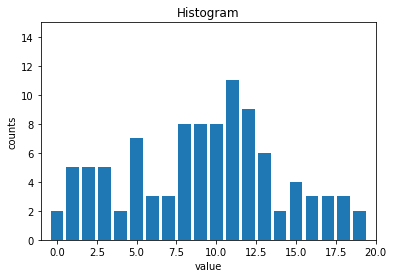

In [116]:
histogram()

_Direct extracting statistical values from histogram using panda functions_

In [111]:
num_points = len(data_list)               
largest_value = max(data_list)            
smallest_value = min(data_list)           

print("num_points:",num_points)
print("largest_value:", largest_value)
print("smallest_value:", smallest_value)

num_points: 99
largest_value: 19
smallest_value: 0


_operation after data sorting_

In [47]:
sorted_values = sorted(data_list)
smallest_value = sorted_values[0]           
third_smallest_value = sorted_values[2]    
third_largest_value = sorted_values[-3] 

print(sorted_values)
print("third largest value:", third_largest_value)
print("third smallest value:", third_smallest_value)

[0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19]
third largest value: 18
third smallest value: 1


_defined information exporting_

In [49]:
def mean(x):
    return sum(x) / len(x)

def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [67]:
print("median:", median(data_list))
print("mean:", int(mean(data_list))) # integral value
print("mode:", mode(data_list))

median: 10
mean: 9
mode: [11]


In [68]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

def data_range(x):
    return max(x) - min(x)

def standard_deviation(x):
    return math.sqrt(variance(x))

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]
# it is supporting function to calculate variance

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

In [93]:
print(" standard deviation:", round(standard_deviation(data_list), 2),"\n", 
    "variance:", round(variance(data_list), 2), "\n",
    "data range:", data_range(data_list), "\n", "\n",
    "interquartile_range:", interquartile_range(data_list), "\n",
    "40th percentile of series:", quantile(data_list, 0.40))

 standard deviation: 4.86 
 variance: 23.63 
 data range: 19 
 
 interquartile_range: 7 
 40th percentile of series: 8


## Correlations

In [117]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

In [120]:
print("Covariance between data series A and B:")
covariance(data.A, data.B)

Covariance between data series A and B:


36.92218099360958

In [121]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

In [122]:
print("Correlation between data series A and B:")
correlation(data.A, data.B)

Correlation between data series A and B:


0.8140256142971476